In [2]:
import shapely
from shapely.geometry import Point, Polygon, LineString, GeometryCollection

In [3]:
class polygon:
    def __init__(self,layer,datatype,noOfpoints):
        self.layer = layer
        self.datatype = datatype
        self.noOfpoints = noOfpoints
        self.points = []

    def addPoints(self,points):
        self.points.append(points.split(" "))

### Reading the source txt file

In [4]:
source = []
with open('./MileStone_Input/Milestone 4/Source.txt','r') as file:
    for line in file:
        source.append(line)

i = 0

source_header = []
source_polygons = []
source_footer = []

while i<len(source):
    if "header" in source[i]:
        while source[i] != "boundary\n":
            source_header.append(source[i])
            i+=1
    
    elif "boundary" in source[i]:
        p1 = polygon(source[i+1].split(" ")[1],source[i+2].split(" ")[1],source[i+3].split("  ")[1])
        for p in range(2,2+int(p1.noOfpoints)):
            p1.addPoints(source[i+3].split("  ")[p])
        source_polygons.append(p1)
        i+=4
    elif 'endstr' in source[i] or 'endlib' in source[i]:
        source_footer.append(source[i])
        i+=1
    else:
        i+=1

print(len(source_polygons))

102560


In [5]:
poi = []
with open('./MileStone_Input/Milestone 4/POI.txt','r') as file:
    for line in file:
        poi.append(line)

i = 0

poi_header = []
poi_polygons = []
poi_footer = []

while i<len(poi):
    if "header" in poi[i]:
        while poi[i] != "boundary\n":
            poi_header.append(poi[i])
            i+=1
    
    elif "boundary" in poi[i]:
        p1 = polygon(poi[i+1].split(" ")[1],poi[i+2].split(" ")[1],poi[i+3].split("  ")[1])
        for p in range(2,2+int(p1.noOfpoints)):
            p1.addPoints(poi[i+3].split("  ")[p])
        poi_polygons.append(p1)
        i+=4
    elif 'endstr' in poi[i] or 'endlib' in poi[i]:
        poi_footer.append(poi[i])
        i+=1
    else:
        i+=1

print(poi_header)
print(poi_polygons)
print(poi_footer)

['header 600 \n', 'bgnlib 1/17/2023 23:11:40 1/17/2023 23:11:40 \n', 'libname egdslib\n', 'units 0.0001 1e-10 \n', '\n', 'bgnstr 1/17/2023 23:11:40 1/17/2023 23:11:40 \n', 'strname top\n', '\n']
[<__main__.polygon object at 0x0000028DA0CE0220>, <__main__.polygon object at 0x0000028DCD6A3580>]
['endstr\n', 'endlib\n']


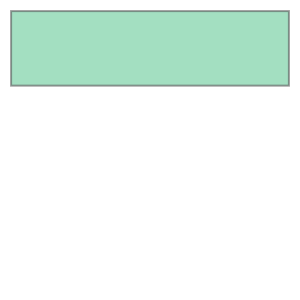

In [23]:
int_points1 = []
for point in poi_polygons[0].points:
    temp = [int(point[0]),int(point[1])]
    int_points1.append(temp)

poi_poly = Polygon(int_points1)
poi_poly

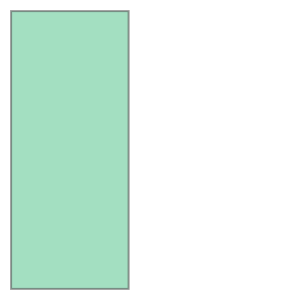

In [24]:
int_points2 = []
for point in poi_polygons[1].points:
    temp = [int(point[0]),int(point[1])]
    int_points2.append(temp)

poi_poly = Polygon(int_points2)
poi_poly

In [21]:
def polygon_area(vertex):
    n = len(vertex)
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += int(vertex[i][0]) * int(vertex[j][1])
        area -= int(vertex[j][0]) * int(vertex[i][1])
    area = abs(area) / 2.0
    return area

In [26]:
poi_area1 = polygon_area(int_points1)
poi_area2 = polygon_area(int_points2)

poi_areas = [poi_area1,poi_area2]

In [27]:
found_polygons = []
source_areas = []
for i in range(0,len(source_polygons)):
    int_points = []
    for point in source_polygons[i].points:
        temp = [int(point[0]),int(point[1])]
        int_points.append(temp)

    source_area = polygon_area(int_points)
    source_areas.append(source_area)


In [29]:
polygonpoints = [int_points1,int_points2]